# Obstructive sleep apnea detection 


This notebook covers a Python-based solution for the **task1: Obstructive sleep apnea detection** of given assignment for technical assesment for **Machine learning Engineer** position. Please refer to the assignment  text for detailed descriptions of task.

In this notebook several machine learning algorithm and a state-of-the-art deep learning method will be implemented for OSA . We'll also extend our implementation to handle ECG signal data and apply the preprocessing techniques fro better data analytics and model building.


## Introduction

<h2>Sleep apneais (SA):</h2> an involuntary cessation of breathing that occurs while the patient is asleep. The Greek word “apnea” literally means “without breath.” There are three types of sleep apnea: obstructive, central, and mixed. Of the three, obstructive sleep apnea, often called OSA for short, is the most common [1].<br>
<p>

<h2>Obstructive sleep apnea (OSA): </h2>
is caused by a blockage of the airway, usually when the soft tissue in the rear of the throat collapses and closes during sleep.

**Sleep apnea is very common, as common as type 2 diabetes [1].**

</p>
<p>
<h2>Severity: </h2>
Untreated, this sleep disorder can cause high blood pressure and other cardiovascular disease, memory problems, weight gain, impotence, and headaches. Moreover, untreated sleep apnea may be responsible for job impairment and motor vehicle crashes. 
</p>
<p>
<h2>Traditional Treatments:</h2>

it can be diagnosed and treated. A definitive diagnosis of sleep apnea can be made only with a sleep study conducted during a visit to a sleep lab, usually overnight, or a home study performed with special equipment.
</p>
<p>However, these type of diagonsed  method requires many electrodes and wires, as well as an expert to monitor the test.

<p>
<h2>Machine Learning for OSA detection</h2>
Several researchers have proposed instead using a traditional methods for OSA diagnosis. Among these options, the ECG signal , is one of the most physiologically relevant signals of OSA occurrence, and one that can be easily recorded using a wearable device. These collected ECG signals than processed using ML algorithm to classified and learn the occurance of apnea phase without need of expert and heavy computaion devices.
</P>

<p>
In this notebook we will use these technogues for OSA detection using </p> 

[Physionet Apnae detection ECG Dataset](https://physionet.org/content/apnea-ecg/1.0.0/).


# Implementation:

In [3]:
#Requirements
!pip install hrv
!pip install wfdb
!pip install biosppy

     |████████████████████████████████| 235kB 7.3MB/s 
  Created wheel for spectrum: filename=spectrum-0.8.0-cp37-cp37m-linux_x86_64.whl size=234766 sha256=94b102c504755912f080c2ea1d1dc8df7744c9cafb890628662fb992294d7008
  Stored in directory: /root/.cache/pip/wheels/62/de/fd/94dc5ad0a7d93803f4cb4a26744d21e91ac4bf0a63004d2b14
Successfully built spectrum
     |████████████████████████████████| 133kB 5.2MB/s 
     |████████████████████████████████| 92kB 4.2MB/s 


##Import Libraries

In [1]:
#change working directory
%cd /content/drive/MyDrive/apnea-ecg-database-1.0.0

/content/drive/MyDrive/apnea-ecg-database-1.0.0


In [4]:

import matplotlib.pyplot as plt
import numpy as np
from hrv.filters import quotient, moving_median
from scipy import interpolate
from tqdm import tqdm
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import wfdb         #Read Signal Dataset    
import matplotlib.pyplot as plt 
import os
import pickle #save data to pkl
import csv

In [6]:
import pickle
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed
import biosppy.signals.tools as st #BIO signlas pre-processing for deep learning 
import numpy as np
import os

from biosppy.signals.ecg import correct_rpeaks, hamilton_segmenter
from scipy.signal import medfilt
import joblib
from tqdm import tqdm

In [17]:
import numpy as nmpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

In [ ]:

import pickle

import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.callbacks import LearningRateScheduler
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import Input, Model
from keras.regularizers import l2
from scipy.interpolate import splev, splrep
import pandas as pd

import pickle

import numpy as np
import os
from keras.models import load_model
from scipy.interpolate import splev, splrep
from sklearn.metrics import confusion_matrix


## Method_01: Machine Learning

### Data Understanding

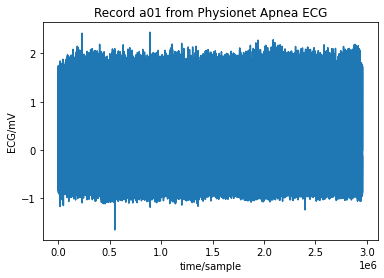

{'adc_gain': [200.0],
 'adc_res': [12],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [5827],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'fs': 100,
 'init_value': [-12],
 'n_sig': 1,
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 0.   ]]),
 'record_name': 'a01',
 'samps_per_frame': [1],
 'sig_len': 2957000,
 'sig_name': ['ECG'],
 'skew': [None],
 'units': ['mV']}

In [6]:
os.listdir("/content/drive/MyDrive/apnea-ecg-database-1.0.0")

record = wfdb.rdrecord('/content/drive/MyDrive/apnea-ecg-database-1.0.0/a01') 
wfdb.plot_wfdb(record, title='Record a01 from Physionet Apnea ECG') 
display(record.__dict__
        )

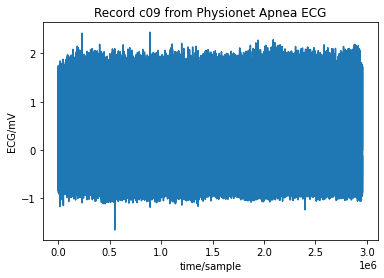

{'adc_gain': [200.0],
 'adc_res': [12],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [65520],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['c09.dat'],
 'fmt': ['16'],
 'fs': 100,
 'init_value': [-7],
 'n_sig': 1,
 'p_signal': array([[-0.035],
        [-0.01 ],
        [ 0.005],
        [ 0.03 ],
        [ 0.04 ],
        [ 0.035],
        [ 0.01 ],
        [-0.01 ],
        [-0.035],
        [-0.04 ],
        [-0.035],
        [-0.01 ],
        [ 0.01 ],
        [ 0.03 ],
        [ 0.04 ],
        [ 0.03 ],
        [ 0.005],
        [-0.015],
        [-0.035],
        [-0.04 ],
        [-0.03 ],
        [-0.01 ],
        [ 0.015],
        [ 0.035],
        [ 0.04 ],
        [ 0.03 ],
        [ 0.005],
        [-0.015],
        [-0.035],
        [-0.04 ],
        [-0.03 ],
        [-0.005],
        [ 0.02 ],

In [7]:
record2 = wfdb.rdrecord('/content/drive/MyDrive/apnea-ecg-database-1.0.0/c09',sampto=1000) 
wfdb.plot_wfdb(record, title='Record c09 from Physionet Apnea ECG') 
display(record2.__dict__)


In [8]:
recordname = "/content/drive/MyDrive/apnea-ecg-database-1.0.0/a04"
#read signal
record3 = wfdb.rdsamp(recordname)
#read annotation
annotation = wfdb.rdann(recordname, extension="apn")

annotation.contained_labels
annotation.get_label_fields()
annotation.symbol[:10]
#Visualize the number of unique classes
np.unique(annotation.symbol, return_counts=True)

(array(['A', 'N'], dtype='<U1'), array([453,  39]))

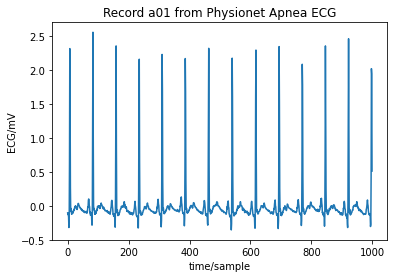

{'adc_gain': [200.0],
 'adc_res': [12],
 'adc_zero': [0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0],
 'block_size': [0],
 'byte_offset': [None],
 'checksum': [1219],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a04.dat'],
 'fmt': ['16'],
 'fs': 100,
 'init_value': [-21],
 'n_sig': 1,
 'p_signal': array([[-0.105],
        [-0.13 ],
        [-0.11 ],
        [-0.165],
        [-0.32 ],
        [-0.21 ],
        [ 0.635],
        [ 2.31 ],
        [ 1.565],
        [ 0.275],
        [-0.085],
        [-0.04 ],
        [-0.065],
        [-0.125],
        [-0.1  ],
        [-0.115],
        [-0.1  ],
        [-0.11 ],
        [-0.08 ],
        [-0.085],
        [-0.06 ],
        [-0.065],
        [-0.035],
        [-0.035],
        [-0.01 ],
        [-0.015],
        [ 0.   ],
        [-0.01 ],
        [-0.025],
        [-0.05 ],
        [-0.04 ],
        [-0.055],
        [-0.035],

In [9]:

#visual signal after applying some filers on data 
record = wfdb.rdrecord(record_name= recordname, sampfrom=0, sampto=1000,channels=None, 
                       physical=True, m2s=True, smooth_frames=True, 
                       ignore_skew=False, return_res=16, force_channels=True, 
                       channel_names=None, warn_empty=False)

wfdb.plot_wfdb(record, title='Record a01 from Physionet Apnea ECG') 
display(record.__dict__)

In [140]:
def ECG_Segment(ECG_Signal_file):
    signals , record = wfdb.rdsamp(ECG_Signal_file)
    bfunc = signals
    rawECGFunc = []
    for i in range(int((bfunc.size / 6000))-2):
        rawECGFunc.append(bfunc[i*6000:((i*6000)+18000)])
    return rawECGFunc

In [9]:
ECGFiles = [] # An List with all the ECG Signal filenames
for root, dirs, files in os.walk(r'/content/drive/MyDrive/apnea-ecg-database-1.0.0'):
    for file in files:
        if file.endswith('.dat'):
            parts = file.split('.')  #split the file using . as separator
            ECGFiles.append(parts[0])  # append only the first part of the file without the extension

In [10]:
names = [
    "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
    "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
    "b01", "b02", "b03", "b04", "b05",
    "c01", "c02", "c03", "c04", "c05", "c06", "c07", "c08", "c09"
]
train=[ECGFile for ECGFile in ECGFiles if any(substring in ECGFile for substring in names)]
train = [s for s in train if s.endswith('r')== False]

In [141]:
# Create list containing the data
AllDataSegmented = []
for i in train:
    Seg = ECG_Segment(base_dir+i)
    AllDataSegmented.append(Seg)


In [142]:
len(AllDataSegmented)

34

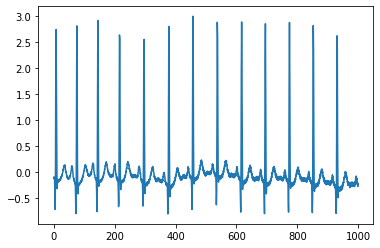

In [143]:
L = AllDataSegmented[0][5][16000:17000,0]
plt.plot(L)
plt.show()

In [144]:
# As seen above we have 35 elements in the list AllDataSegmented
# To extract all the segments for one ECG file use AllDataSegmented[X] eg
b = AllDataSegmented[4]

# To extract one of the 3 min segments from this ECG signal use b = AllDataSegmented[X][X]
d = AllDataSegmented[4][3][12000:18000]

# to extract one section eg 60seconds of one of the 3 min segments of 1 of the signals use b = AllDataSegmented[X][X][0:6000]
e = AllDataSegmented[1][3][0:18000]

# To extract 1 3 min segment as a flat array rather than an array of lists containing 1 value
L = AllDataSegmented[1][3][:18000,0]

In [145]:
d.shape

(6000, 1)

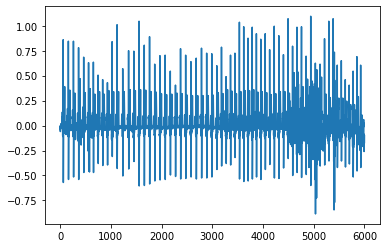

In [146]:
plt.plot(d)
plt.show()

In [147]:
L = AllDataSegmented[4][3][:18000,0]

In [148]:
## Try soem basic filtyers on the data
def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({ 
        'data' : y_sine} ,index=t_sine)
    return result

#High Pass filter

def butter_highpass(cutoff, fs, order=15):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=1):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


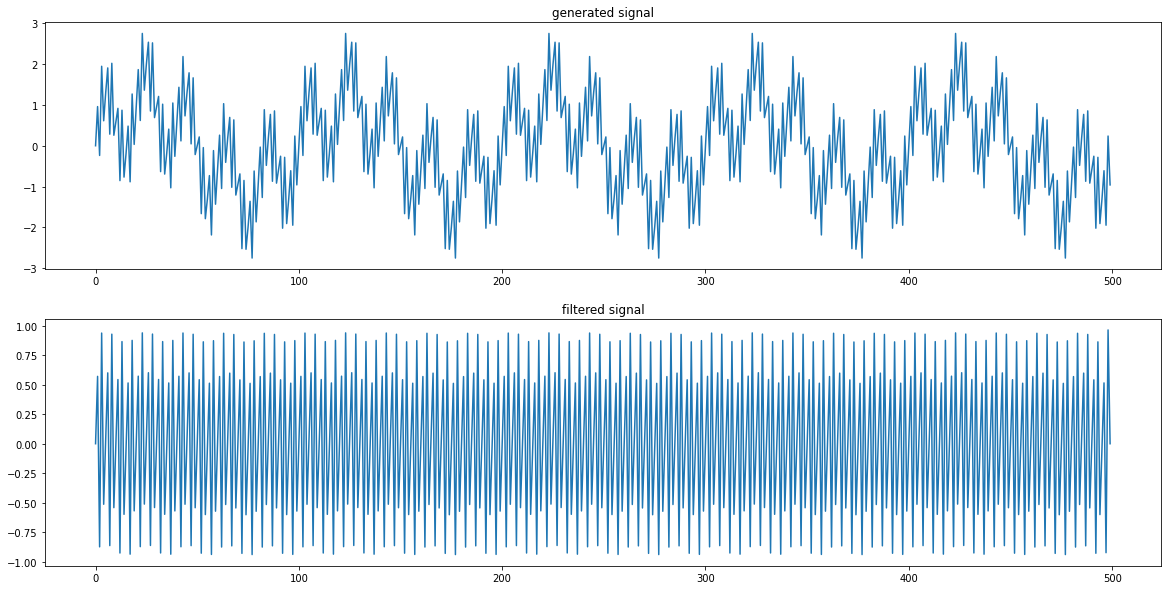

In [149]:

fps = 100
sine_fq = 5 #Hz
duration = 5 #seconds
sine_5Hz = sine_generator(fps,sine_fq,duration)
sine_fq = 1 #Hz
duration = 5 #seconds
sine_1Hz = sine_generator(fps,sine_fq,duration)

sine_fq = 40 #Hz
duration = 5 #seconds
sine_40Hz = sine_generator(fps,sine_fq,duration)

sine = sine_5Hz + sine_1Hz + sine_40Hz

filtered_sine = butter_highpass_filter(sine.data,20,fps)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(sine)),sine)
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(filtered_sine)),filtered_sine)
plt.title('filtered signal')
plt.show()

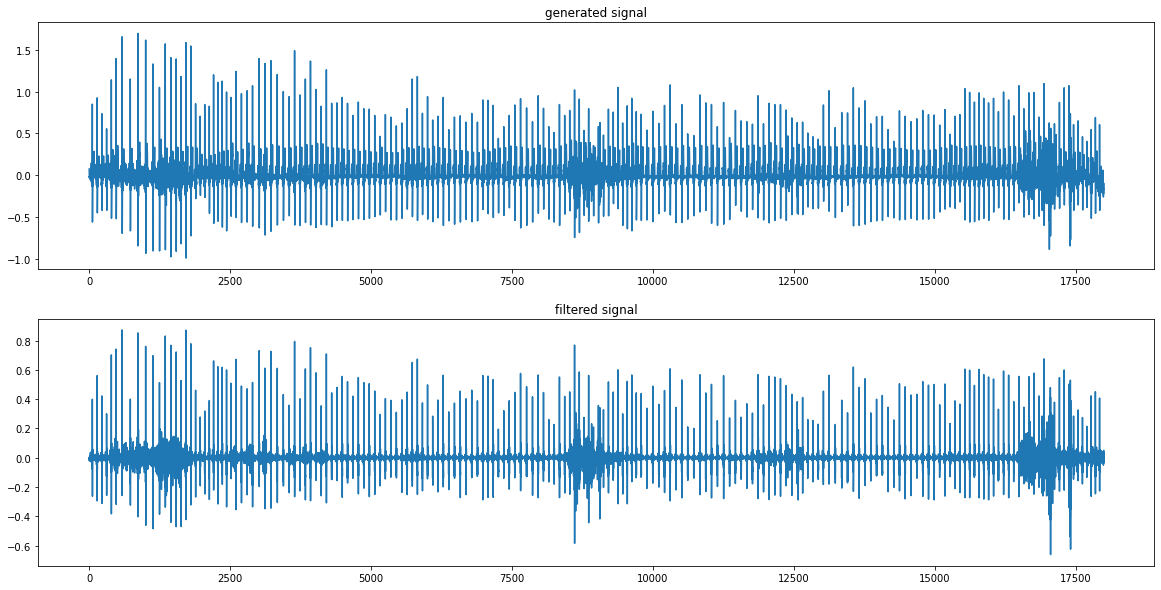

In [152]:


# Trying data filtering
t_ECG = np.linspace(0,10, 18000, endpoint=False)
ECG = pd.DataFrame({'data' : L}, index=t_ECG)

filtered_ecg = butter_highpass_filter(ECG.data,20,fps)   # 20 here is the 20Hz cutoff

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(ECG)),ECG)
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(filtered_ecg)),filtered_ecg)
plt.title('filtered signal')
plt.show()

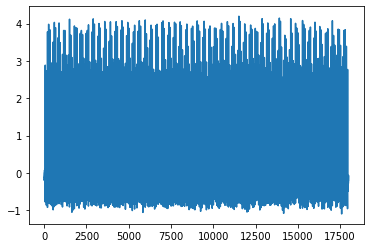

In [157]:
#L = MidDataSegments[0][1][10000:12000,0]
L = MidDataSegments[0][5]
plt.plot(L)
plt.show()

In [158]:
AllDataFiltered = []
t_ECG = np.linspace(0,180, 18000, endpoint=False)    # Setup the index for the dataframe used
for i in MidDataSegments:
    SegmentsFiltered = []
    for j in i:
        TempSig = j[:18000,0]
        ECG = pd.DataFrame({'data' : TempSig}, index=t_ECG)
        filtered_ecg = butter_highpass_filter(ECG.data,20,fps)
        SegmentsFiltered.append(filtered_ecg)
    AllDataFiltered.append(SegmentsFiltered)

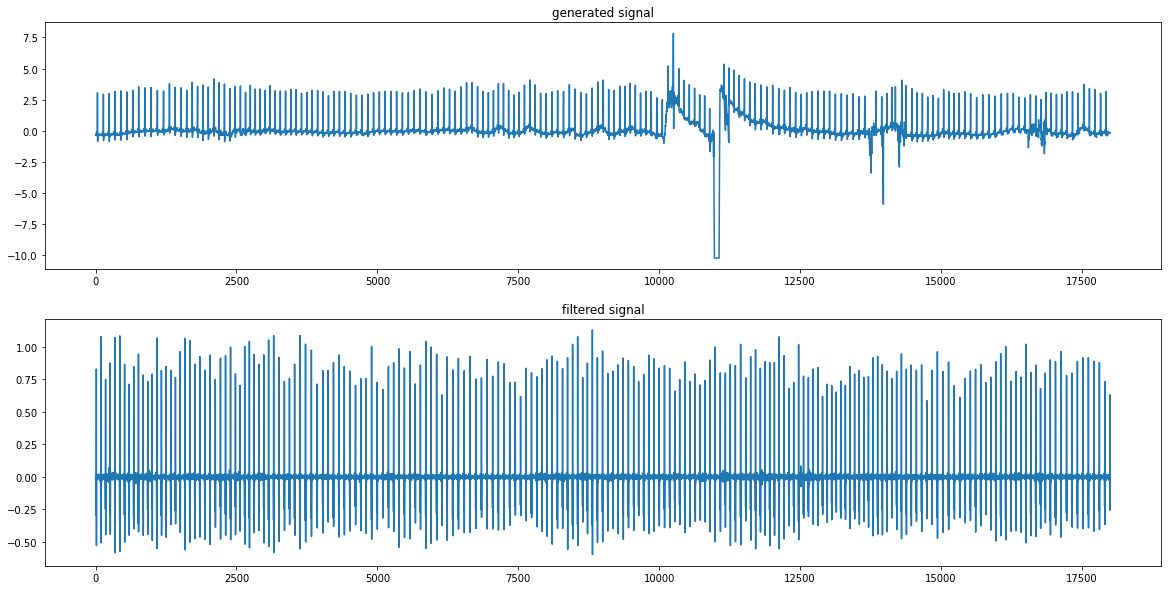

In [159]:
# Plot an example of one of the data segments and its filtered version

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(AllDataSegmented[16][3])),AllDataSegmented[16][3])
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(AllDataFiltered[16][3])),AllDataFiltered[16][3])
plt.title('filtered signal')
plt.show()

### Data pre-processing

Existing literature for OSA  have shown that the RR intervals and R-peak amplitudes of ECG signal contain critical information about the occurrence of OSA. Hence, a preprocessing procedure is applied to obtain the RR intervals and R-peak amplitudes from the ECG signal. Notably, the original ECG signal contains a lot of noise (i.e., baseline drift and power frequency noise), and we have used interp_cubic_spline filtering and some other basic filters to denoise data. <br>
Aside: In figure, The RR interval (RRI) and PP interval (PPI) representing cardiac beat-to-beat interval extracted from the simultaneously recorded ECG and PPG signals respectively. 

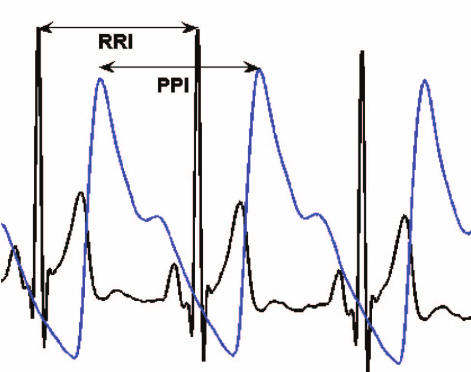

In [8]:


data_path = '/content/drive/MyDrive/apnea-ecg-database-1.0.0/'

train_data_name = ['a01', 'a02', 'a03', 'a04', 'a05',
             'a06', 'a07', 'a08', 'a09', 'a10',
             'a11', 'a12', 'a13', 'a14', 'a15',
             'a16', 'a17', 'a18', 'a19',"a20",
             'b01', 'b02', 'b03', 'b04','b05',
             'c01', 'c02', 'c03', 'c04', 'c05',
             'c06', 'c07', 'c08', 'c09'
             ]

age = [51, 38, 54, 52, 58,
       63, 44, 51, 52, 58,
       58, 52, 51, 51, 60,
       44, 40, 52, 55, 58,
       44, 53, 53, 42, 52,
       31, 37, 39, 41, 28,
       28, 30, 42, 37, 27]
sex = [1, 1, 1, 1, 1,
       1, 1, 1, 1, 1,
       1, 1, 1, 1, 1,
       1, 1, 1, 1, 1,
       0, 1, 1, 1, 1,
       1, 1, 1, 0, 0,
       0, 0, 1, 1, 1]


def get_qrs_amp(ecg, qrs):
    interval = int(FS * 0.250)
    qrs_amp = []
    for index in range(len(qrs)):
        curr_qrs = qrs[index]
        amp = np.max(ecg[curr_qrs-interval:curr_qrs+interval])
        qrs_amp.append(amp)

    return qrs_amp



In [7]:

FS = 100.0

def create_time_info(rri):
    rri_time = np.cumsum(rri) / 1000.0  # make it seconds
    return rri_time - rri_time[0]   # force it to start at zero

def create_interp_time(rri, fs):
    time_rri = create_time_info(rri)
    return np.arange(0, time_rri[-1], 1 / float(fs))
# for processing rri signal 
def interp_cubic_spline(rri, fs):
    time_rri = create_time_info(rri)
    time_rri_interp = create_interp_time(rri, fs)
    tck = interpolate.splrep(time_rri, rri, s=0)
    rri_interp = interpolate.splev(time_rri_interp, tck, der=0)
    return time_rri_interp, rri_interp
# on annotation
def interp_cubic_spline_qrs(qrs_index, qrs_amp, fs):
    time_qrs = qrs_index / float(FS)
    time_qrs = time_qrs - time_qrs[0]
    time_qrs_interp = np.arange(0, time_qrs[-1], 1/float(fs))
    tck = interpolate.splrep(time_qrs, qrs_amp, s=0)
    qrs_interp = interpolate.splev(time_qrs_interp, tck, der=0)
    return time_qrs_interp, qrs_interp

In [9]:
MARGIN = 10
FS_INTP = 4
MAX_HR = 300.0
MIN_HR = 20.0
MIN_RRI = 1.0 / (MAX_HR / 60.0) * 1000
MAX_RRI = 1.0 / (MIN_HR / 60.0) * 1000
train_input_array = []
train_label_array = []


In [17]:

for data_index in range(len(train_data_name)):
    print (train_data_name[data_index])
    # getting annotations
    win_num = len(wfdb.rdann(os.path.join(data_path,train_data_name[data_index]), 'apn').symbol)
    # Read signal data
    signals, fields = wfdb.rdsamp(os.path.join(data_path,train_data_name[data_index]))
    # take every 60 second window
    for index in tqdm(range(1, win_num)):
        samp_from = index * 60 * FS # 60 seconds
        samp_to = samp_from + 60 * FS  # 60 seconds
        # read binary files containing labels (annotations) in qrs format
        qrs_ann = wfdb.rdann(data_path + train_data_name[data_index], 'qrs', sampfrom=samp_from - (MARGIN*100), sampto=samp_to + (MARGIN*100)).sample
        # read MIT annnotaion file of recoed
        apn_ann = wfdb.rdann(data_path + train_data_name[data_index], 'apn', sampfrom=samp_from, sampto=samp_to-1).symbol
        # get signal value at selected timestemp on every 60s sample
        qrs_amp = get_qrs_amp(signals, qrs_ann)
        #the RR interval (rri) series must first be preprocessed to isolate frequencies of interest. 
        rri = np.diff(qrs_ann)
        #the rri to millisecond 
        rri_ms = rri.astype('float') / FS * 1000.0
        try:
            rri_filt = moving_median(rri_ms)
            # Apply transformation function of raw rri signals to remove noice

            if len(rri_filt) > 5 and (np.min(rri_filt) >= MIN_RRI and np.max(rri_filt) <= MAX_RRI):
                time_intp, rri_intp = interp_cubic_spline(rri_filt, FS_INTP)
                qrs_time_intp, qrs_intp = interp_cubic_spline_qrs(qrs_ann, qrs_amp, FS_INTP)
                #processed ECG signal
                rri_intp = rri_intp[(time_intp >= MARGIN) & (time_intp < (60+MARGIN))]
                #relevent annotation object on ech time stamp
                qrs_intp = qrs_intp[(qrs_time_intp >= MARGIN) & (qrs_time_intp < (60 + MARGIN))]
                #time_intp = time_intp[(time_intp >= MARGIN) & (time_intp < (60+MARGIN))]

                if len(rri_intp) != (FS_INTP * 60):
                    skip = 1
                else:
                    skip = 0

                if skip == 0:
                    rri_intp = rri_intp - np.mean(rri_intp)
                    qrs_intp = qrs_intp - np.mean(qrs_intp)
                    if apn_ann[0] == 'N': # Normal
                        label = 0.0
                    elif apn_ann[0] == 'A': # Apnea
                        label = 1.0
                    else:
                        label = 2.0

                    train_input_array.append([rri_intp, qrs_intp, age[data_index], sex[data_index]])
                    train_label_array.append(label)
        except:
            hrv_module_error = 1
np.save('train_input.npy', train_input_array)
np.save('train_label.npy', train_label_array)



  1%|          | 6/488 [00:00<00:08, 56.03it/s]

a01



100%|██████████| 488/488 [02:14<00:00,  3.62it/s]

  1%|          | 5/527 [00:00<00:10, 49.53it/s]

a02



100%|██████████| 527/527 [02:44<00:00,  3.21it/s]

  1%|          | 6/518 [00:00<00:09, 55.16it/s]

a03



100%|██████████| 518/518 [02:39<00:00,  3.25it/s]

  1%|          | 5/491 [00:00<00:11, 43.31it/s]

a04



100%|██████████| 491/491 [02:23<00:00,  3.42it/s]

  1%|▏         | 6/453 [00:00<00:08, 54.38it/s]

a05



100%|██████████| 453/453 [02:00<00:00,  3.75it/s]

  1%|          | 6/509 [00:00<00:09, 50.70it/s]

a06



100%|██████████| 509/509 [02:15<00:00,  3.75it/s]

  1%|          | 6/510 [00:00<00:09, 50.40it/s]

a07



100%|██████████| 510/510 [02:52<00:00,  2.96it/s]

  1%|          | 5/500 [00:00<00:10, 46.54it/s]

a08



100%|██████████| 500/500 [03:07<00:00,  2.67it/s]

  1%|          | 6/494 [00:00<00:09, 51.91it/s]

a09



100%|██████████| 494/494 [02:23<00:00,  3.44it/s]

  1%|▏         | 7/516 [00:00<00:08, 61.35it/s]

a10



100%|██████████| 516/516 [02:35<00:00,  3.32it/s]

  1%|▏         | 6/465 [00:00<00:08, 53.31it/s]

a11



100%|██████████| 465/465 [02:24<00:00,  3.22it/s]

  1%|          | 5/576 [00:00<00:12, 46.83it/s]

a12



100%|██████████| 576/576 [03:07<00:00,  3.06it/s]

  1%|          | 5/494 [00:00<00:10, 48.32it/s]

a13



100%|██████████| 494/494 [03:02<00:00,  2.71it/s]

  1%|          | 6/508 [00:00<00:08, 59.97it/s]

a14



100%|██████████| 508/508 [02:15<00:00,  3.75it/s]

  1%|          | 6/509 [00:00<00:08, 56.59it/s]

a15



100%|██████████| 509/509 [02:40<00:00,  3.18it/s]

  1%|          | 5/481 [00:00<00:09, 48.16it/s]

a16



100%|██████████| 481/481 [02:38<00:00,  3.03it/s]

  1%|          | 5/484 [00:00<00:10, 47.88it/s]

a17



100%|██████████| 484/484 [02:48<00:00,  2.87it/s]

  1%|          | 5/488 [00:00<00:10, 47.69it/s]

a18



100%|██████████| 488/488 [02:21<00:00,  3.44it/s]

  1%|          | 5/501 [00:00<00:10, 45.45it/s]

a19



100%|██████████| 501/501 [03:00<00:00,  2.78it/s]

  1%|          | 5/509 [00:00<00:10, 48.31it/s]

a20



100%|██████████| 509/509 [02:46<00:00,  3.06it/s]

  1%|          | 6/486 [00:00<00:08, 55.88it/s]

b01



100%|██████████| 486/486 [02:41<00:00,  3.01it/s]

  0%|          | 0/516 [00:00<?, ?it/s]


b02


100%|██████████| 516/516 [02:54<00:00,  2.96it/s]

  1%|          | 5/440 [00:00<00:08, 49.74it/s]

b03



100%|██████████| 440/440 [02:05<00:00,  3.50it/s]

  2%|▏         | 10/428 [00:00<00:04, 86.51it/s]

b04



100%|██████████| 428/428 [01:47<00:00,  3.97it/s]


b05



100%|██████████| 432/432 [02:06<00:00,  3.43it/s]


c01



100%|██████████| 483/483 [02:11<00:00,  3.67it/s]


c02



100%|██████████| 501/501 [02:35<00:00,  3.22it/s]


c03



100%|██████████| 453/453 [01:52<00:00,  4.04it/s]


c04



100%|██████████| 481/481 [02:15<00:00,  3.54it/s]


c05



100%|██████████| 465/465 [02:13<00:00,  3.49it/s]


c06



100%|██████████| 467/467 [02:14<00:00,  3.47it/s]


c07



100%|██████████| 428/428 [02:18<00:00,  3.08it/s]


c08



100%|██████████| 512/512 [02:42<00:00,  3.16it/s]


c09



100%|██████████| 467/467 [02:24<00:00,  3.22it/s]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


### Load and Train-Test-Split

In [18]:


train_input = nmpy.load('/content/drive/MyDrive/apnea-ecg-database-1.0.0/train_input.npy', allow_pickle=True)
train_label = nmpy.load('/content/drive/MyDrive/apnea-ecg-database-1.0.0/train_label.npy', allow_pickle=True)


def split_data(train_input):
    X1 = []
    X2 = []
    for index in range(len(train_input)):
        X1.append([train_input[index][0], train_input[index][1]])
        X2.append([train_input[index][2], train_input[index][3]])

    return nmpy.array(X1).astype('float64'), nmpy.array(X2).astype('float64')



def get_data(train_input,train_label):

    X_train, X_test, y_train, y_test = train_test_split(train_input, train_label, test_size=0.20, random_state=42)
    X_train1, X_train2 = split_data(X_train)
    X_test1,  X_test2   = split_data(X_test)

    X_train1 = nmpy.transpose(X_train1, (0, 2, 1))
    X_train2 = nmpy.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
    X_test1  = nmpy.transpose(X_test1, (0, 2, 1))
    X_test2  = nmpy.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))

    return X_train1, X_train2, y_train, X_test1, X_test2, y_test



In [19]:
# call split data  function 
X_train1, X_train2, y_train, X_test1, X_test2, y_test = get_data(train_input,train_label)


In [20]:
#values present are on different scale hence we need to standardize them so 
#that our gradient descent can reach the minima at a faster pace
def scale(train_input):
    scalers = {}
    for i in range(train_input.shape[2]):
        scalers[i] = StandardScaler()
        train_input[:, i, :] = scalers[i].fit_transform(train_input[:, i, :]) 
    return train_input

In [21]:
#scale the train and test data 

X_train1 = scale(X_train1)
X_train2 = scale(X_train2)


X_test1 = scale(X_test1) 
X_test2 = scale(X_test2)



In [22]:
X_train1.shape

(12833, 240, 2)

In [23]:
nsamples, nx, ny = X_train1.shape
#change data to 3d ndarray to 2d array to give it to ML model
d2_train_dataset = X_train1.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test1.shape
#change data to 3d ndarray to 2d array to give it to ML model
d2_test_dataset = X_test1.reshape((nsamples, nx*ny))

## ML Classification Algorithms

### Support vector machine  

In [32]:


svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',random_state=0)



svc_fit = svc.fit(d2_train_dataset,y_train)
y_pred_svc = svc_fit.predict(d2_test_dataset)
confusionMatrixSVC = pd.crosstab(y_test,y_pred_svc, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixSVC)

AccuracySVM = metrics.accuracy_score(y_test, y_pred_svc)
print ('Accuracy',AccuracySVM)



Predicted   0.0  1.0   All
Actual                    
0.0        1791  171  1962
1.0         511  736  1247
All        2302  907  3209
Accuracy 0.7874727329386102


### Random Forest Classifier

In [33]:

rfc = RandomForestClassifier()


rfc_fit=rfc.fit(d2_train_dataset,y_train)
y_pred_RFC = rfc_fit.predict(d2_test_dataset)

confusionMatrixSVC = pd.crosstab(y_test,y_pred_RFC, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixSVC)

AccuracyRFC = metrics.accuracy_score(y_test, y_pred_RFC)
print ('Accuracy',AccuracyRFC)



Predicted   0.0   1.0   All
Actual                     
0.0        1722   240  1962
1.0         390   857  1247
All        2112  1097  3209
Accuracy 0.8036771579931443


### Decesion Trees

In [34]:
#decesion trees

dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(d2_train_dataset,y_train)
dtc.score(d2_train_dataset,y_train)
y_pred_dt = svc_fit.predict(d2_test_dataset)
print(dtc.score(d2_test_dataset,y_pred_dt))
confusionMatrixDTC = pd.crosstab(y_test,y_pred_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixDTC)


AccuracyDTC = metrics.accuracy_score(y_test, y_pred_dt)
print ('Accuracy',AccuracyDTC)

0.7058273605484575
Predicted   0.0  1.0   All
Actual                    
0.0        1791  171  1962
1.0         511  736  1247
All        2302  907  3209
Accuracy 0.7874727329386102


### K Nearest Neighbour

In [35]:
#KNN

knn = KNeighborsClassifier()
knn_fit = knn.fit(d2_train_dataset,y_train)
knn.score(d2_train_dataset,y_train)
y_pred_KNN = knn_fit.predict(d2_test_dataset)

confusionMatrixKNN = pd.crosstab(y_test,y_pred_KNN, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixKNN)

AccuracyKNN = metrics.accuracy_score(y_test, y_pred_KNN)
print ('Accuracy',AccuracyKNN)

Predicted   0.0   1.0   All
Actual                     
0.0        1576   386  1962
1.0         431   816  1247
All        2007  1202  3209
Accuracy 0.7454035525085696


### Adaptive Boosting Algorithm

In [36]:
#AdaBoost

ADA_fit = AdaBoostClassifier(random_state=0).fit(d2_train_dataset,y_train)
y_pred_ADA = ADA_fit.predict(d2_test_dataset)
confusionMatrixADA = pd.crosstab(y_test,y_pred_ADA, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixADA)


AccuracyADA = metrics.accuracy_score(y_test, y_pred_ADA)
print ('Accuracy',AccuracyADA)

Predicted   0.0   1.0   All
Actual                     
0.0        1603   359  1962
1.0         534   713  1247
All        2137  1072  3209
Accuracy 0.7454035525085696


### Gaussian Naive bayes Classifoer

In [44]:

GNB_fit = GaussianNB().fit(d2_train_dataset,y_train)
y_pred_GNB = GNB_fit.predict(d2_test_dataset)
confusionMatrixGNB = pd.crosstab(y_test,y_pred_GNB, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixGNB)

AccuracyGNB = metrics.accuracy_score(y_test, y_pred_GNB)
print ('Accuracy',AccuracyGNB)


Predicted   0.0  1.0   All
Actual                    
0.0        1669  293  1962
1.0         796  451  1247
All        2465  744  3209
Accuracy 0.6606419445310066


### Quadratic Discriminant Analysis

In [46]:

QDA_fit = QuadraticDiscriminantAnalysis().fit(d2_train_dataset,y_train)
y_pred_QDA = QDA_fit.predict(d2_test_dataset)
confusionMatrixQDA = pd.crosstab(y_test,y_pred_QDA, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMatrixQDA)


AccuracyQDA = metrics.accuracy_score(y_test, y_pred_QDA)
print ('Accuracy',AccuracyQDA)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Predicted   0.0  1.0   All
Actual                    
0.0        1879   83  1962
1.0        1217   30  1247
All        3096  113  3209
Accuracy 0.594889373636647


## Comparision OF accuracy of ML Algorithms for OSA detectiion.

In [47]:
import matplotlib.pyplot as plt

results = {u'SVM':AccuracySVM, u'RFC': AccuracyRFC, u'DTC':AccuracyDTC, u'KNN':AccuracyKNN, u'ADAbosst':AccuracyADA
           , u'GNB':AccuracyGNB, u'QDA':AccuracyQDA}


In [50]:
import json


json = json.dumps(results)
f = open("MLresults.json","w")
f.write(json)
f.close()


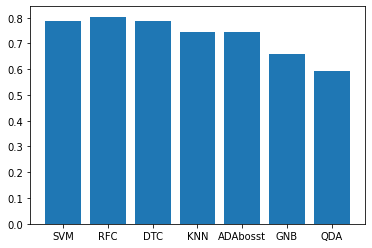

In [48]:
plt.bar(*zip(*results.items()))
plt.show()

**So far, Random forest classifier is best performing ML Algorithm.**

##Method_02:  Deep Neural Network

### Dataset Preprocessing

Below is The Flow Diagram of  PhysioNet Apnea-ECG dataset preprocessing scheme.
Note: In this [2] , the labeled segment and its surrounding ±2 segments of the ECG signal (five 1-minute segments in total) was extracted as a whole for processing.

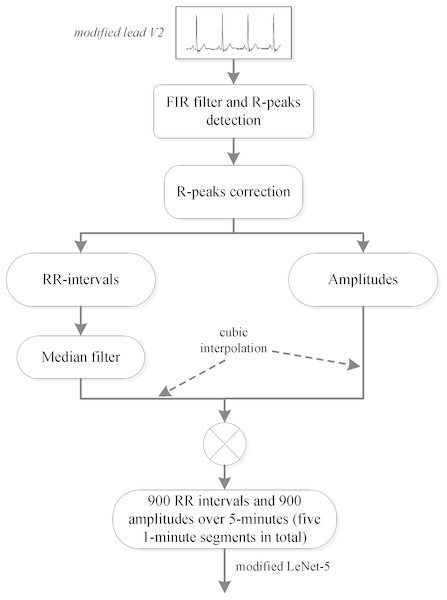

In [9]:

base_dir = "/content/drive/MyDrive/apnea-ecg-database-1.0.0"

fs = 100
sample = fs * 60  # 1 min's sample points

before = 2  # forward interval (min)
after = 2  # backward interval (min)
hr_min = 20
hr_max = 300

num_worker = 35 if joblib.cpu_count() > 35 else joblib.cpu_count() - 1  # Setting according to the number of CPU cores


def worker(name, labels):
    X = []
    y = []
    groups = []
    signals = wfdb.rdrecord(os.path.join(base_dir, name), channels=[0]).p_signal[:, 0]
    for j in tqdm(range(len(labels)), desc=name, file=sys.stdout):
        if j < before or \
                (j + 1 + after) > len(signals) / float(sample):
            continue
        signal = signals[int((j - before) * sample):int((j + 1 + after) * sample)]
        signal, _, _ = st.filter_signal(signal, ftype='FIR', band='bandpass', order=int(0.3 * fs),
                                        frequency=[3, 45], sampling_rate=fs)
        # Find R peaks
        rpeaks, = hamilton_segmenter(signal, sampling_rate=fs)
        rpeaks, = correct_rpeaks(signal, rpeaks=rpeaks, sampling_rate=fs, tol=0.1)
        if len(rpeaks) / (1 + after + before) < 40 or \
                len(rpeaks) / (1 + after + before) > 200:  # Remove abnormal R peaks signal
            continue
        # Extract RRI, Ampl signal
        rri_tm, rri_signal = rpeaks[1:] / float(fs), np.diff(rpeaks) / float(fs)
        rri_signal = medfilt(rri_signal, kernel_size=3)
        ampl_tm, ampl_siganl = rpeaks / float(fs), signal[rpeaks]
        hr = 60 / rri_signal
        # Remove physiologically impossible HR signal
        if np.all(np.logical_and(hr >= hr_min, hr <= hr_max)):
            # Save extracted signal
            X.append([(rri_tm, rri_signal), (ampl_tm, ampl_siganl)])
            y.append(0. if labels[j] == 'N' else 1.)
            groups.append(name)
    return X, y, groups



In [ ]:

apnea_ecg = {}

names = [
    "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
    "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
    "b01", "b02", "b03", "b04", "b05",
    "c01", "c02", "c03", "c04", "c05", "c06", "c07", "c08", "c09"
]

o_train = []
y_train = []
groups_train = []
print('Training...')
with ProcessPoolExecutor(max_workers=num_worker) as executor:
    task_list = []
    for i in range(len(names)):
        labels = wfdb.rdann(os.path.join(base_dir, names[i]), extension="apn").symbol
        task_list.append(executor.submit(worker, names[i], labels))

    for task in as_completed(task_list):
        X, y, groups = task.result()
        o_train.extend(X)
        y_train.extend(y)
        groups_train.extend(groups)

print()



In [15]:

answers = {}
with open(os.path.join(base_dir, "/content/drive/MyDrive/apnea-ecg-database-1.0.0/answer.txt"), "r") as f:
    for answer in f.read().split("\n\n"):
        answers[answer[:3]] = list("".join(answer.split()[2::2]))

names = [
    "x01", "x02", "x03", "x04", "x05", "x06", "x07", "x08", "x09", "x10",
    "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20",
    "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30",
    "x31", "x32", "x33", "x34", "x35"
]

o_test = []
y_test = []
groups_test = []
print("Testing...")
with ProcessPoolExecutor(max_workers=num_worker) as executor:
    task_list = []
    for i in range(len(names)):
        labels = answers[names[i]]
        task_list.append(executor.submit(worker, names[i], labels))

    for task in as_completed(task_list):
        X, y, groups = task.result()
        o_test.extend(X)
        y_test.extend(y)
        groups_test.extend(groups)

apnea_ecg = dict(o_train=o_train, y_train=y_train, groups_train=groups_train, o_test=o_test, y_test=y_test,
                  groups_test=groups_test)
with open(os.path.join(base_dir, "apnea-ecg.pkl"), "wb") as f:
    pickle.dump(apnea_ecg, f, protocol=2)

print("\nok!")

Testing...
x35: 100%|██████████| 483/483 [01:52<00:00,  4.29it/s]

ok!


### Model Bulding

Unlike with character recognition, the time series used in this study had one-dimensional data, which is significantly different from two-dimensional character recognition problems.
Therefore,  LeNet-5 is adjusted as follows: 
1. using a one-dimensional convolution operation instead of a two-dimensional convolution operation to feature extraction 
2. adding a dropout layer between the convolution layer and fully connected layer to avoid over-fitting 
3. retaining only one fully connected layer to reduce network complexity 
4. modifying the size of the convolution layer strides and the number of fully-connected layer nodes.

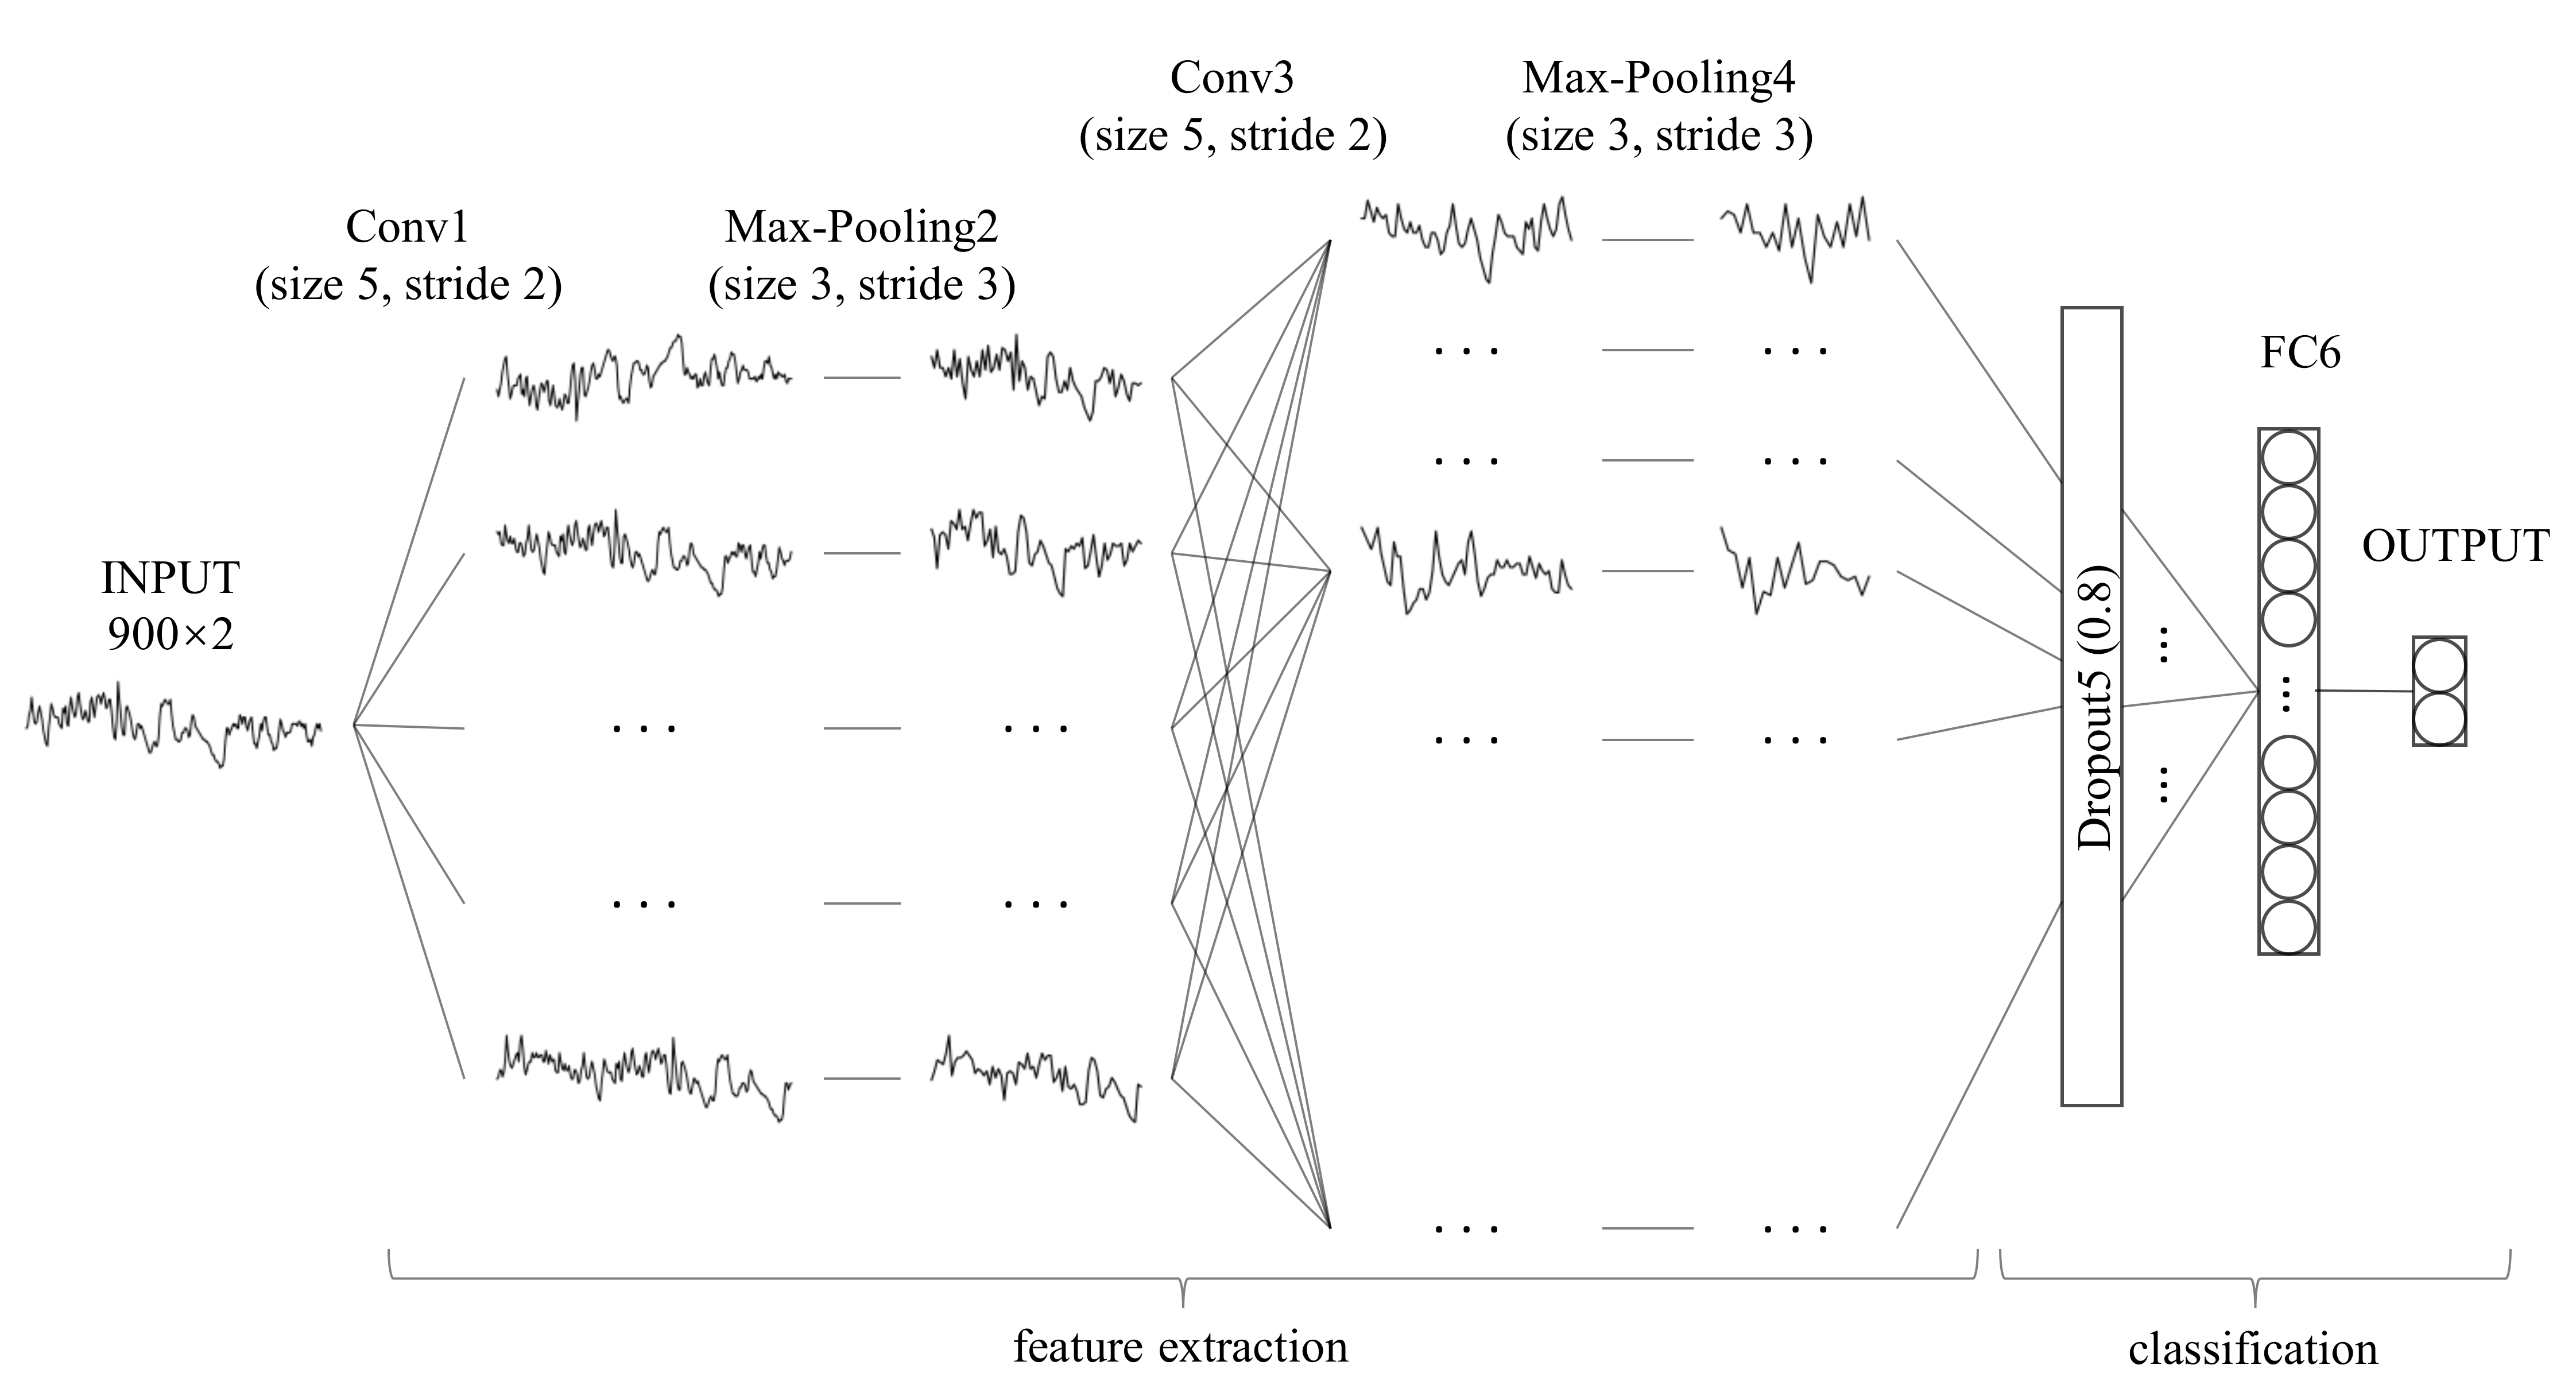

In [32]:



ir = 3 # interpolate interval
before = 2
after = 2

# normalize
scaler = lambda arr: (arr - np.min(arr)) / (np.max(arr) - np.min(arr))


def load_data():
    tm = np.arange(0, (before + 1 + after) * 60, step=1 / float(ir))

    with open(os.path.join(base_dir, "apnea-ecg.pkl"), 'rb') as f: # read preprocessing result
        apnea_ecg = pickle.load(f)

    x_train = []
    o_train, y_train = apnea_ecg["o_train"], apnea_ecg["y_train"]
    groups_train = apnea_ecg["groups_train"]
    for i in range(len(o_train)):
        (rri_tm, rri_signal), (ampl_tm, ampl_siganl) = o_train[i]
		# Curve interpolation
        rri_interp_signal = splev(tm, splrep(rri_tm, scaler(rri_signal), k=3), ext=1) 
        ampl_interp_signal = splev(tm, splrep(ampl_tm, scaler(ampl_siganl), k=3), ext=1)
        x_train.append([rri_interp_signal, ampl_interp_signal])
    x_train = np.array(x_train, dtype="float32").transpose((0, 2, 1)) # convert to numpy format
    y_train = np.array(y_train, dtype="float32")

    x_test = []
    o_test, y_test = apnea_ecg["o_test"], apnea_ecg["y_test"]
    groups_test = apnea_ecg["groups_test"]
    for i in range(len(o_test)):
        (rri_tm, rri_signal), (ampl_tm, ampl_siganl) = o_test[i]
		# Curve interpolation
        rri_interp_signal = splev(tm, splrep(rri_tm, scaler(rri_signal), k=3), ext=1)
        ampl_interp_signal = splev(tm, splrep(ampl_tm, scaler(ampl_siganl), k=3), ext=1)
        x_test.append([rri_interp_signal, ampl_interp_signal])
    x_test = np.array(x_test, dtype="float32").transpose((0, 2, 1))
    y_test = np.array(y_test, dtype="float32")

    return x_train, y_train, groups_train, x_test, y_test, groups_test


def create_model(input_shape, weight=1e-3):
    """Create a Modified LeNet-5 model"""
    inputs = Input(shape=input_shape)
    # Conv1
    x = Conv1D(32, kernel_size=5, strides=2, padding="valid", activation="relu", kernel_initializer="he_normal",
               kernel_regularizer=l2(weight), bias_regularizer=l2(weight))(inputs)
    x = MaxPooling1D(pool_size=3)(x)

	# Conv3
    x = Conv1D(64, kernel_size=5, strides=2, padding="valid", activation="relu", kernel_initializer="he_normal",
               kernel_regularizer=l2(1e-3), bias_regularizer=l2(weight))(x)
    x = MaxPooling1D(pool_size=3)(x)

    x = Dropout(0.8)(x) # Avoid overfitting

	# FC6
    x = Flatten()(x)
    x = Dense(32, activation="relu")(x)
    outputs = Dense(2, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


def lr_schedule(epoch, lr):
    if epoch > 70 and \
            (epoch - 1) % 10 == 0:
        lr *= 0.1
    print("Learning rate: ", lr)
    return lr


def plot(history):
    """Plot performance curve"""
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].plot(history["loss"], "r-", history["val_loss"], "b-", linewidth=0.5)
    axes[0].set_title("Loss")
    axes[1].plot(history["accuracy"], "r-", history["val_accuracy"], "b-", linewidth=0.5)
    axes[1].set_title("Accuracy")
    fig.tight_layout()
    fig.show()



In [25]:

x_train, y_train, groups_train, x_test, y_test, groups_test = load_data()

y_train = keras.utils.to_categorical(y_train, num_classes=2) # Convert to two categories
y_test = keras.utils.to_categorical(y_test, num_classes=2)

print("train num:", len(y_train))
print("test num:", len(y_test))

model = create_model(input_shape=x_train.shape[1:])
model.summary()

from keras.utils import plot_model

plot_model(model, "model.png") # Plot model


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule) # Dynamic adjustment learning rate
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])
model.save(os.path.join("models", "model.final.h5")) # Save training model

loss, accuracy = model.evaluate(x_test, y_test) # test the model
print("Test loss: ", loss)
print("Accuracy: ", accuracy)

# save prediction score
y_score = model.predict(x_test)
output = pd.DataFrame({"y_true": y_test[:, 1], "y_score": y_score[:, 1], "subject": groups_test})
output.to_csv(os.path.join("output", "LeNet.csv"), index=False)

plot(history.history)

train num: 16295
test num: 16945
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 900, 2)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 448, 32)           352       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 149, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 73, 64)            10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 64)            0         
_________________________________________________________________
flatten (Flatten)           

FileNotFoundError: ignored

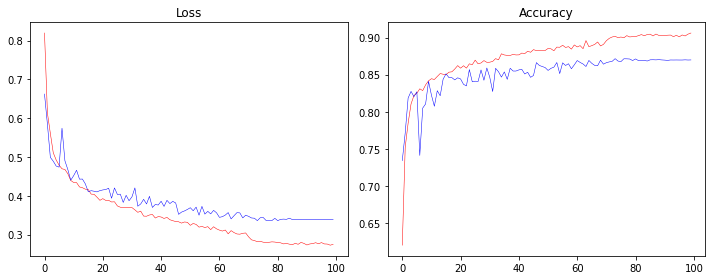

In [33]:
output.to_csv(os.path.join("/content/drive/MyDrive/apnea-ecg-database-1.0.0/output/LeNet.csv"), index=False)

plot(history.history)

### Evaluation

In [107]:



ir = 3
before = 2
after = 2

# normalize
scaler = lambda arr: (arr - np.min(arr)) / (np.max(arr) - np.min(arr))


def load_data():
    tm = np.arange(0, (before + 1 + after) * 60, step=1 / float(ir))

    with open(os.path.join(base_dir, "apnea-ecg.pkl"), 'rb') as f:
        apnea_ecg = pickle.load(f)

    x_train = []
    o_train, y_train = apnea_ecg["o_train"], apnea_ecg["y_train"]
    groups_train = apnea_ecg["groups_train"]
    for i in range(len(o_train)):
        (rri_tm, rri_signal), (ampl_tm, ampl_siganl) = o_train[i]
        rri_interp_signal = splev(tm, splrep(rri_tm, scaler(rri_signal), k=3), ext=1)
        ampl_interp_signal = splev(tm, splrep(ampl_tm, scaler(ampl_siganl), k=3), ext=1)
        x_train.append([rri_interp_signal, ampl_interp_signal])
    x_train = np.array(x_train, dtype="float32").transpose((0, 2, 1))
    y_train = np.array(y_train, dtype="float32")

    x_test = []
    o_test, y_test = apnea_ecg["o_test"], apnea_ecg["y_test"]
    groups_test = apnea_ecg["groups_test"]
    for i in range(len(o_test)):
        (rri_tm, rri_signal), (ampl_tm, ampl_siganl) = o_test[i]
        rri_interp_signal = splev(tm, splrep(rri_tm, scaler(rri_signal), k=3), ext=1)
        ampl_interp_signal = splev(tm, splrep(ampl_tm, scaler(ampl_siganl), k=3), ext=1)
        x_test.append([rri_interp_signal, ampl_interp_signal])
    x_test = np.array(x_test, dtype="float32").transpose((0, 2, 1))
    y_test = np.array(y_test, dtype="float32")

    return (x_train, y_train, groups_train), (x_test, y_test, groups_test)




In [9]:

(x_train, y_train, groups_train), (x_test, y_test, groups_test) = load_data()

model = load_model(os.path.join("./models", "model.final.h5"))
model.summary()

print("training:")
y_true, y_pred = y_train, np.argmax(model.predict(x_train, batch_size=1024, verbose=1), axis=-1)

C = confusion_matrix(y_true, y_pred, labels=(1, 0))
TP, TN, FP, FN = C[0, 0], C[1, 1], C[1, 0], C[0, 1]
acc, sn, sp = 1. * (TP + TN) / (TP + TN + FP + FN), 1. * TP / (TP + FN), 1. * TN / (TN + FP)
print("acc: {}, sn: {}, sp: {}".format(acc, sn, sp))

print("testing:")
y_true, y_pred = y_test, np.argmax(model.predict(x_test, batch_size=1024, verbose=1), axis=-1)

C = confusion_matrix(y_true, y_pred, labels=(1, 0))
TP, TN, FP, FN = C[0, 0], C[1, 1], C[1, 0], C[0, 1]
acc, sn, sp = 1. * (TP + TN) / (TP + TN + FP + FN), 1. * TP / (TP + FN), 1. * TN / (TN + FP)
print("acc: {}, sn: {}, sp: {}".format(acc, sn, sp))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 900, 2)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 448, 32)           352       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 149, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 73, 64)            10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0     

## Conclusion

It can be observed, the classification accuracy of ML algorithm Randon Forest Classifieris ~81%, which is lower than a simple 5-layers CNN arcihtecture proposed in [2] with an accuracy of 87.6%. As the best accuracy achived for OSA detection by Apple Watch is 90% in test time.This shows the potriential of CNN model for signal based OSA detection. Furthermore, as the proposed model by Wang et al. [2] is a based on a very basic deep NN model. The Accuracy of  can easily be improved by using some stat-of-art deep learning techniques like, Using bulk Datasets, deploying some data normalization techniques and manymore.

##References

[1]  &nbsp;&nbsp;*https://www.sleepapnea.org/learn/sleep-apnea/* <br>
[2]  &nbsp;&nbsp;*Wang T, Lu C, Shen G, et al. Sleep apnea detection from a single-lead ECG signal with automatic feature-extraction through a modified LeNet-5 convolutional neural network[J]. PeerJ, 2019, 7: e7731. https://doi.org/10.7717/peerj.7731* <br>